# EDA for Incident Rate Data 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load Dataset

In [3]:
df = pd.read_csv('../data/processed/incidence_rate_cleaned.csv')

## Basic Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84946 entries, 0 to 84945
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   group                84946 non-null  object 
 1   code                 84946 non-null  object 
 2   name                 84946 non-null  object 
 3   year                 84946 non-null  int64  
 4   disease              84946 non-null  object 
 5   disease_description  84946 non-null  object 
 6   denominator          84946 non-null  object 
 7   incidence_rate       84946 non-null  float64
 8   is_zero_incidence    84946 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 5.8+ MB


In [5]:
df.head()

,group,code,name,year,disease,disease_description,denominator,incidence_rate,is_zero_incidence
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital Rubella Syndrome,"per 10,000 live births",0.0,1
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0,1
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive Meningococcal Disease,"per 1,000,000 total population",9.3,0
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,"per 1,000,000 total population",0.0,1
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,"per 1,000,000 total population",0.0,1


In [6]:
df.isnull().sum()

group                  0
code                   0
name                   0
year                   0
disease                0
disease_description    0
denominator            0
incidence_rate         0
is_zero_incidence      0
dtype: int64

In [9]:
df.shape

(84946, 9)

## Summary Statistics

In [10]:
df.describe(include = 'all')

,group,code,name,year,disease,disease_description,denominator,incidence_rate,is_zero_incidence
count,84946,84946,84946,84946.000000,84946,84946,84946,84946.000000,84946.000000
unique,4,222,222,NaN,14,14,6,NaN,NaN
top,COUNTRIES,GLOBAL,Global,NaN,MEASLES,Measles,"per 1,000,000 total population",NaN,NaN
freq,82054,424,424,NaN,9196,9196,61480,NaN,NaN
mean,NaN,NaN,NaN,2004.072199,NaN,NaN,NaN,79.347982,0.659289
std,NaN,NaN,NaN,14.349848,NaN,NaN,NaN,846.291145,0.473951
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,1994.000000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,0.000000,1.000000
75%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,0.900000,1.000000


## Distribution of Indices rates

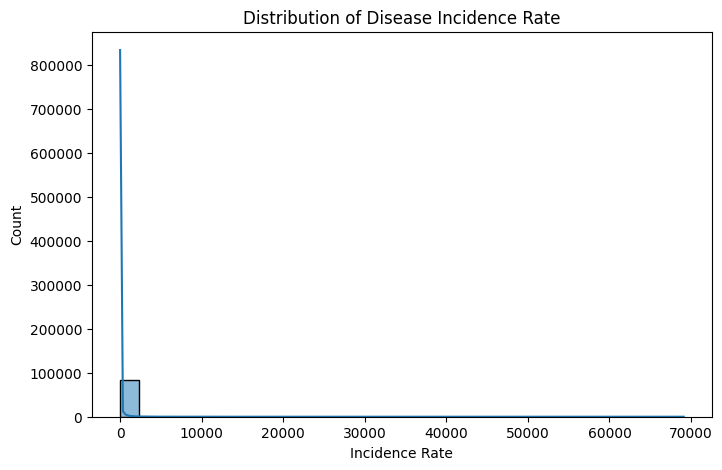

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['incidence_rate'], bins=30, kde=True)
plt.title("Distribution of Disease Incidence Rate")
plt.xlabel("Incidence Rate")
plt.ylabel("Count")
plt.savefig("../output/Incident_Rate/Distribution of Disease Incidence Rate.png")
plt.show()

## Average incidence trend over time (all diseases)

In [13]:
yearly_trend = df.groupby('year')['incidence_rate'].mean().reset_index()

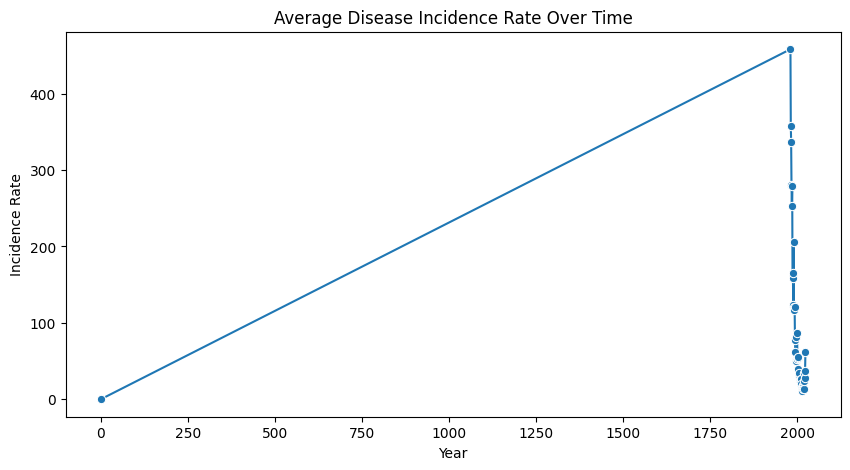

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trend, x="year", y="incidence_rate", marker="o")
plt.title("Average Disease Incidence Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.savefig("../output/Incident_Rate/Average Disease Incidence Rate Over Time.png")
plt.show()

## Top 10 diseases by average incidence

In [15]:
top_diseases = df.groupby("disease_description")['incidence_rate'].mean().sort_values(ascending=False).head(10)

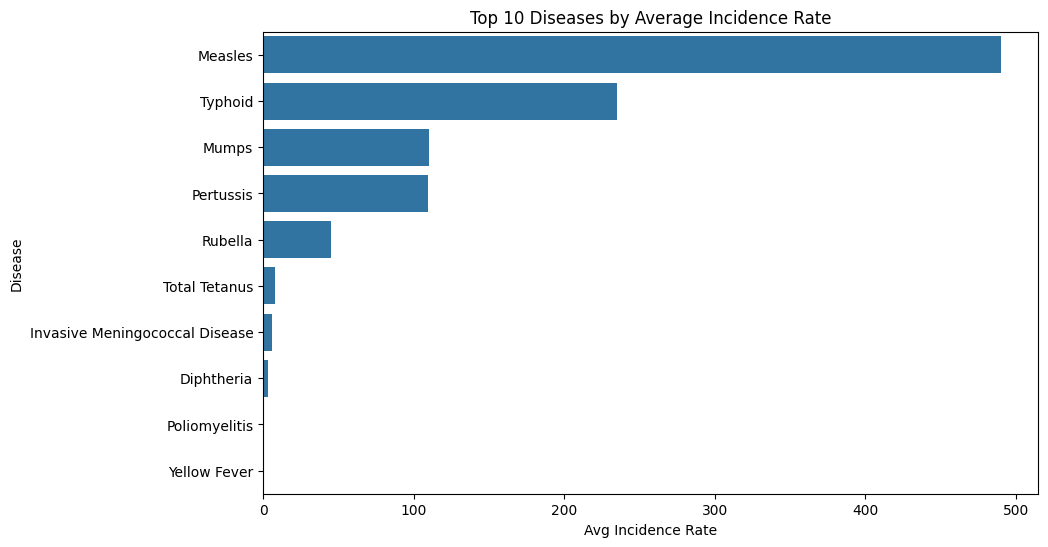

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_diseases.values, y=top_diseases.index)
plt.title("Top 10 Diseases by Average Incidence Rate")
plt.xlabel("Avg Incidence Rate")
plt.ylabel("Disease")
plt.savefig("../output/Incident_Rate/Top 10 Diseases by Average Incidence Rate.png")
plt.show()

##  Yearly trends for specific diseases

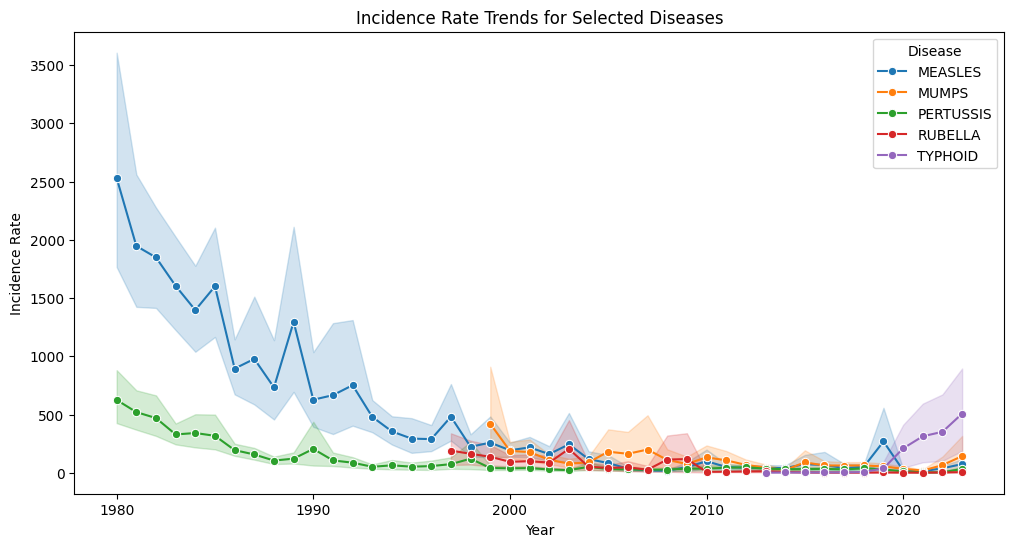

In [17]:
selected_diseases = ["MEASLES", "TYPHOID", "MUMPS", "PERTUSSIS", "RUBELLA"]

plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['disease'].isin(selected_diseases)],
             x="year", y="incidence_rate", hue="disease", marker="o")
plt.title("Incidence Rate Trends for Selected Diseases")
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.legend(title="Disease")
plt.savefig("../output/Incident_Rate/Incidence Rate Trends for Selected Diseases.png")
plt.show()

## Correlation Analysis (numeric columns only)

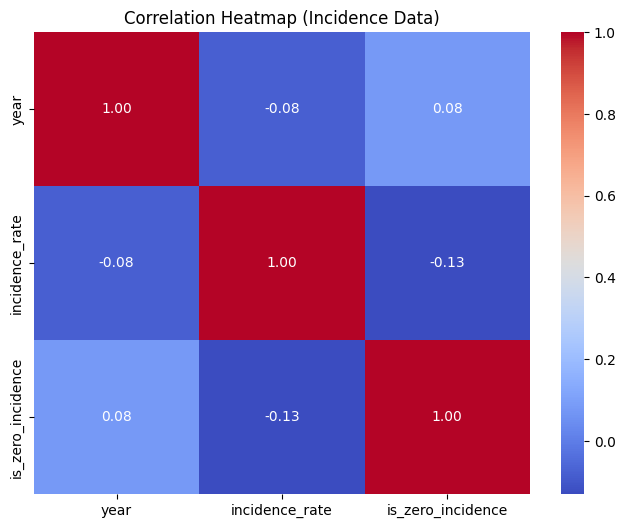

In [18]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Incidence Data)")
plt.savefig("../output/Incident_Rate/Correlation Heatmap (Incidence Data).png")
plt.show()

## Country-level analysis (example)

In [21]:
selected_countries = ["India", "Brazil"]

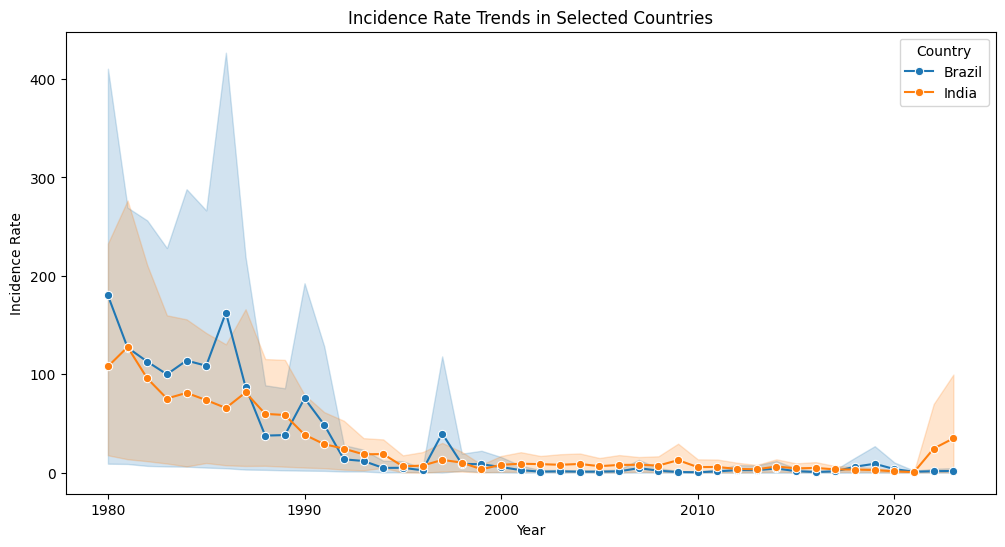

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['name'].isin(selected_countries)],
             x="year", y="incidence_rate", hue="name", marker="o")
plt.title("Incidence Rate Trends in Selected Countries")
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.legend(title="Country")
plt.savefig("../output/Incident_Rate/Incidence Rate Trends in Selected Countries.png")
plt.show()